<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [3]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак в таблице 22 столбца.
Вот их описание:
* `airports_nearest` расстояние до ближайшего аэропорта в метрах (м)
* `balcony` число балконов
* `ceiling_height` высота потолков (м)
* `cityCenters_nearest` расстояние до центра города (м)
* `days_exposition` сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` дата публикации
* `floor` этаж
* `floors_total` всего этажей в доме
* `is_apartment` апартаменты (булев тип)
* `kitchen_area` площадь кухни в квадратных метрах (м²)
* `last_price` цена на момент снятия с публикации
* `living_area` жилая площадь в квадратных метрах (м²)
* `locality_name` название населённого пункта
* `open_plan` свободная планировка (булев тип)
* `parks_around3000` число парков в радиусе 3 км
* `parks_nearest` расстояние до ближайшего парка (м)
* `ponds_around3000` число водоёмов в радиусе 3 км
* `ponds_nearest` расстояние до ближайшего водоёма (м)
* `rooms` число комнат
* `studio` квартира-студия (булев тип)
* `total_area` площадь квартиры в квадратных метрах (м²)
* `total_images` число фотографий квартиры в объявлении

### Вывод

Есть столбцы с пустыми значениями. Проанализируем их и либо заполним подходящими либо просто выкинем из расчёта.

## Предобработка данных

Посмотрим на столбцы с пуыстыми значениями.Посмотрим насколько плоха ситуация посчитав доли пустых в общему.

In [6]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Пойдем по списку - первым идёт высота потолков

In [8]:
null_ceiling = data[data['ceiling_height'].isna()]
null_ceiling['locality_name'].count()

9160

In [9]:
data = data.dropna(subset=['locality_name'])

In [10]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387315
floors_total            0.003594
living_area             0.080254
floor                   0.000000
is_apartment            0.883298
studio                  0.000000
open_plan               0.000000
kitchen_area            0.095941
balcony                 0.486808
locality_name           0.000000
airports_nearest        0.233996
cityCenters_nearest     0.233023
parks_around3000        0.232981
parks_nearest           0.659027
ponds_around3000        0.232981
ponds_nearest           0.615856
days_exposition         0.134461
dtype: float64

In [11]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [12]:
def categorize_place(name, axis):
    if 'деревня' in name:
        category = 'деревня'
        return category
    elif 'посёлок' in name or 'поселок' in name:
        category = 'посёлок'
        return category
    elif 'село ' in name:
        category = 'посёлок'
        return category
    elif 'Санкт-Петербург' in name or 'Москва' in name:
        category = 'мегаполис'
        return category
    elif 'садовое' in name :
        category = 'садовое товарищество'                
        return category
    else:
        category = 'пригород'                
        return category

In [13]:
data['place_category'] = data['locality_name'].apply(categorize_place,axis=1) 

Для заполнения данных установим медианное значения высоты потолка группируя по типу населённого пункта(что мы категоризировали ранее).

In [14]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('place_category')['ceiling_height'].transform('median'))

Перейдем к столбцу "balcony"

In [15]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Есть записи где балкон обозначен как null присвоим таким значение 0

In [16]:
#заменим пустые значение на 0
data['balcony'] = data['balcony'].fillna(value=0)

In [17]:
#заменим пустоту по "parks_nearest" на 0 если в "parks_around3000" = 0 и сделаем так аналогично с "ponds_nearest"
data.loc[(data['parks_nearest'].isna()) & (data['parks_around3000'] == 0),'parks_nearest']=0
data.loc[(data['ponds_nearest'].isna()) & (data['ponds_around3000'] == 0),'ponds_nearest']=0

In [18]:
#Заменм на 0 значения где и расстояние и число (парков/водоёмов) пустое
data.loc[(data['parks_around3000'].isna()&(data['parks_nearest'].isna())),'parks_nearest']=0
data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'] == 0),'parks_around3000']=0
data.loc[(data['ponds_around3000'].isna()&(data['ponds_nearest'].isna())),'ponds_nearest']=0
data.loc[(data['ponds_around3000'].isna()) & (data['ponds_nearest'] == 0),'ponds_around3000']=0

In [19]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.003594
living_area             0.080254
floor                   0.000000
is_apartment            0.883298
studio                  0.000000
open_plan               0.000000
kitchen_area            0.095941
balcony                 0.000000
locality_name           0.000000
airports_nearest        0.233996
cityCenters_nearest     0.233023
parks_around3000        0.000000
parks_nearest           0.000000
ponds_around3000        0.000000
ponds_nearest           0.000000
days_exposition         0.134461
place_category          0.000000
dtype: float64

In [20]:
#т.к. значения в столдбцах имеют булевый тип корректней будет эти столбцы переназвать
data = data.rename(columns={'parks_around3000':'is_park_around','ponds_around3000':'is_pond_around'})

In [21]:
# Пустые значения по аэропорту заменим на медианые в зависимости от населенного пункта 
#Изначально пытался сделать с группировкой по городу,
#Hо по большому колчеству населенных пунктов значений ни по аэропорту ни по центру просто нет, поэтому так изголяемся
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('place_category')['airports_nearest'].transform('median'))

In [22]:
# Пустые значения по расстояние до центра города (м) заменим на медианые в зависимости от населенного пункта
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('place_category')['cityCenters_nearest'].transform('median'))

In [23]:
# не попавшиеся значения уберем из выборки
data = data.dropna(subset=['cityCenters_nearest'])
data = data.dropna(subset=['airports_nearest'])

In [24]:
#Для значений с пустым колчиеством итоговых этажей будем считать на какомтаже квартира столько и этажей
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [25]:
# Какитми значениями заполнить living_area и kitchen_area я пока не представляю. Но открыт к советам. 
# Из выборки мы их удалим благо общая доля их от всей небольшая
data = data.dropna(subset=['living_area'])
data = data.dropna(subset=['kitchen_area'])

Т.к. всё те строки у которых days_exposition пустой обладают first_day_exposition, мы возьмём максимальную дату(будем считать что это последняя дата среда выборки) и вычтем из нее первую дату, получим дельту которая и будет числом дней от размещения публикации

In [26]:
#для начала преобразуем поле с датой собственно в дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [27]:
max_date = data["first_day_exposition"].max()
max_date 

Timestamp('2019-05-03 00:00:00')

In [28]:
data['days_exposition_delta'] = (max_date-data['first_day_exposition']).replace('days','')
data['days_exposition_delta'] = data['days_exposition_delta'].astype('str')
data['days_exposition_delta']

0          57 days
1         150 days
2        1352 days
4         318 days
5         235 days
           ...    
23692     665 days
23693    1001 days
23694     773 days
23695     473 days
23698     651 days
Name: days_exposition_delta, Length: 20135, dtype: object

Т.к. почему то .replace('days','') не работает, то дабы не сломать компьютер от ярости непонимания почему так мы делаем финт ушами и пишем функцию который этот replace собственно делает

In [29]:
def get_rid_of_days(x):
    if 'days' in x['days_exposition_delta'] :
        category = x['days_exposition_delta'].replace('days','')
        return category
    else:
        category = 'ошибка в данных'
        return category

In [30]:
data['get_rid_of_days']=data.apply(get_rid_of_days, axis=1)

In [31]:
#пустые значения по days_exposition заполняем этой разницей что считали ранее
data.loc[(data['days_exposition'].isna()),'days_exposition']=data['get_rid_of_days']

In [32]:
data['days_exposition']=data['days_exposition'].astype('int')

In [33]:
data.isna().mean()

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.000000
living_area              0.000000
floor                    0.000000
is_apartment             0.879464
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.000000
airports_nearest         0.000000
cityCenters_nearest      0.000000
is_park_around           0.000000
parks_nearest            0.000000
is_pond_around           0.000000
ponds_nearest            0.000000
days_exposition          0.000000
place_category           0.000000
days_exposition_delta    0.000000
get_rid_of_days          0.000000
dtype: float64

Чем заполнить is_apartment я также не придумал. Удалять пустые строки нельзя - всю выборку убьем. Поэтому просто проигнорируем.

In [34]:
data.loc[data['is_apartment'].isna(),'is_apartment']=False

<div class="alert alert-info"> По твоему совету назначил пустым значениям значение False<div>

In [35]:
#Напоследок удалим вспомогательные столбцы
del data['get_rid_of_days']
del data['days_exposition_delta']

Вывод - в данных большое количество ошибок. Понятное дело, когда данные по-разному создаваемые потом объединяются в одно проблем не избежать. Но для таких целей, существует инженер по данным который придумывает правила по-которым данные хранятся и создаются. 
Благо мы знаем как выявлять и заполнять значения.

## Расчёты и добавление результатов в таблицу

In [36]:
#Добавим стоимость цену квадратного метра
data['sqr_meter']=data['last_price']/data['total_area']

In [37]:
#Добавим в таблицу: день недели, месяц и год публикации объявления
data['year']=pd.DatetimeIndex(data['first_day_exposition']).year
data['month']=pd.DatetimeIndex(data['first_day_exposition']).month
data['weekday']=pd.DatetimeIndex(data['first_day_exposition']).weekday

In [38]:
def categorize_floor(x):
    if x['floor'] == 1:
        category ='первый'
        return category
    elif x['floor'] == x['floors_total']:
        category = 'последний'
        return category
    else:
        category = 'другое'
        return category

In [39]:
# Добавим в таблицу категорию этажа квартиры
data['floor_category']=data.apply(categorize_floor, axis=1)

In [40]:
#Добавим в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
data['kitchen_total_relate']=(data['kitchen_area']/data['total_area'])*100
data['living_to_total_relate']=(data['living_area']/data['total_area'])*100

Мы добавили вспомогательные поля, для одного использовали функцию, Благодаря работe на прошлом шаге(предобработке данных) проблем не возникло.

## Исследовательский анализ данных

Наконец-то приступим к изучения параметров!
Посмотрим на количество комнат

In [41]:
import matplotlib.pyplot as plt

<AxesSubplot:>

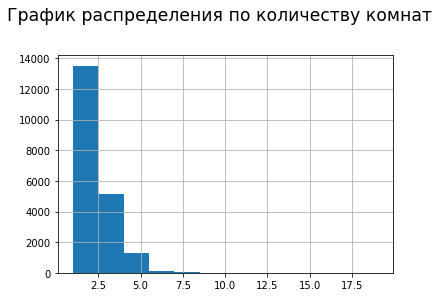

In [42]:
plt.suptitle('График распределения по количеству комнат', x=0.5, y=1.05, ha='center', fontsize='xx-large')
data['rooms'].hist(bins=12)

Большая часть комант что продают 1-2 комнатные, совсем немного 10 и 8 комнатных - похоже на правду

<AxesSubplot:>

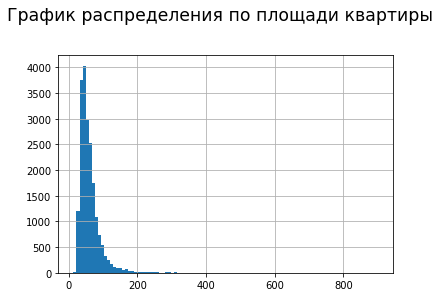

In [43]:
plt.suptitle('График распределения по площади квартиры', x=0.5, y=1.05, ha='center', fontsize='xx-large')
data['total_area'].hist(bins=100)

Как можно заменить график +- соотносится с графиком по комнатам. Оно и логично больше комнат - больше общая площадь

In [44]:
data['last_price']=data['last_price']/1000

<AxesSubplot:>

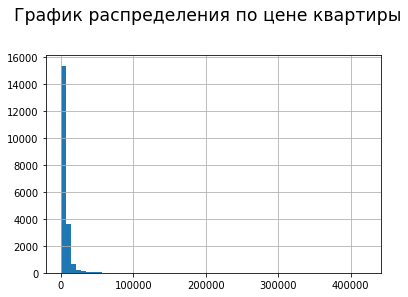

In [45]:
plt.suptitle('График распределения по цене квартиры', x=0.5, y=1.05, ha='center', fontsize='xx-large')
data['last_price'].hist(bins=60)

Странным является то, что нет квартир с очень низкой ценой

<AxesSubplot:>

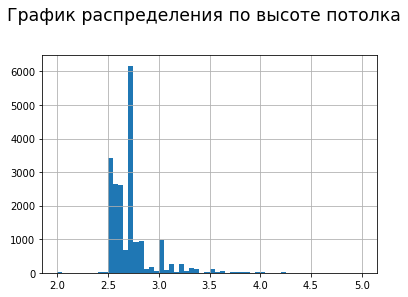

In [46]:
plt.suptitle('График распределения по высоте потолка', x=0.5, y=1.05, ha='center', fontsize='xx-large')
data['ceiling_height'].hist(range=(2, 5),bins=60)

Странно то есть падение в высоте потолков после 2,6 метров и потом резкий рост до 3. Кажется в данные закралась ошибка. Возможно это не правильно но уберём те данные у которых высота больше 3 и меньше 3.1 возможно так уберём этот странный пик

In [47]:
#good_data = data.query('ceiling_height>3.1 or ceiling_height < 3')
good_data = data.query('ceiling_height>2.5 or ceiling_height < 3')

<AxesSubplot:>

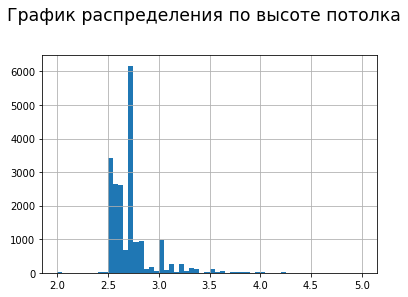

In [48]:
plt.suptitle('График распределения по высоте потолка', x=0.5, y=1.05, ha='center', fontsize='xx-large')
good_data['ceiling_height'].hist(range=(2, 5),bins=60)

<AxesSubplot:>

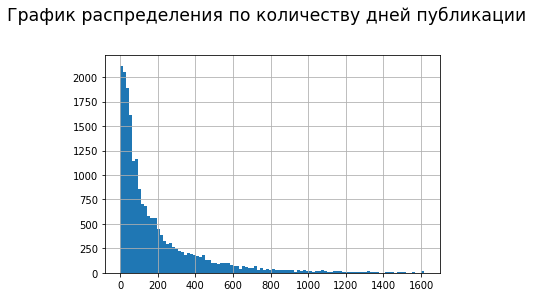

In [49]:
plt.suptitle('График распределения по количеству дней публикации', x=0.5, y=1.05, ha='center', fontsize='xx-large')
good_data['days_exposition'].hist(bins=100)

In [50]:
print('Медианное значение продажи квартиры равно:',good_data['days_exposition'].median())
print('Среднее время продажи квартиры равно:',good_data['days_exposition'].mean())
print('Мода продажи квартиры равно:',good_data['days_exposition'].mode())

Медианное значение продажи квартиры равно: 99.0
Среднее время продажи квартиры равно: 189.65999503352373
Мода продажи квартиры равно: 0    45
dtype: int64


Много странностей, попробуем выяснить в чем сложность. В частности квартиры котоыре сразу продали - это аномалия, её надо убрать

In [51]:
best_data = good_data.query('days_exposition>0')
#посмотрим теперь

In [52]:
print('Медианное значение продажи квартиры равно:',best_data['days_exposition'].median())
print('Среднее время продажи квартиры равно:',best_data['days_exposition'].mean())
print('Мода продажи квартиры равно:',best_data['days_exposition'].mode())

Медианное значение продажи квартиры равно: 99.0
Среднее время продажи квартиры равно: 189.81082558775287
Мода продажи квартиры равно: 0    45
dtype: int64


In [53]:
best_data['days_exposition'].describe()

count    20119.000000
mean       189.810826
std        235.936248
min          1.000000
25%         42.000000
50%         99.000000
75%        244.000000
max       1618.000000
Name: days_exposition, dtype: float64

Самая быстрая продажа - 1 день, долгая - 1618. Нормальная продажа - 42 дня, всё что выше 244 - долгая

Посмотрим какие параметры больше всего влияют на стоимость квартиры

In [54]:
best_data.corr(method ='pearson')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,parks_nearest,is_pond_around,ponds_nearest,days_exposition,sqr_meter,year,month,weekday,kitchen_total_relate,living_to_total_relate
total_images,1.000000,0.115296,0.116452,0.090686,0.006590,0.024137,0.100485,0.039051,NaN,NaN,...,0.020254,0.004197,0.006407,-0.037406,0.140436,0.162132,0.003525,-0.008281,-0.019217,0.003908
last_price,0.115296,1.000000,0.691742,0.390784,0.081872,-0.003047,0.603849,0.029415,NaN,NaN,...,0.118727,0.214302,0.087178,0.107584,0.742589,-0.044446,-0.000180,-0.006274,-0.088589,0.000447
total_area,0.116452,0.691742,1.000000,0.770971,0.089358,-0.063337,0.939716,-0.016329,NaN,NaN,...,0.114150,0.196605,0.082131,0.171947,0.301271,-0.084547,0.006075,-0.006793,-0.317951,0.158458
rooms,0.090686,0.390784,0.770971,1.000000,0.052530,-0.214917,0.849368,-0.143571,NaN,NaN,...,0.073274,0.115163,0.052559,0.136526,0.051102,-0.056842,-0.002027,-0.002739,-0.590412,0.527064
ceiling_height,0.006590,0.081872,0.089358,0.052530,1.000000,-0.021745,0.086698,-0.010062,NaN,NaN,...,0.032329,0.071807,0.016929,0.023539,0.124620,-0.002441,-0.005600,-0.011086,0.011502,0.008862
floors_total,0.024137,-0.003047,-0.063337,-0.214917,-0.021745,1.000000,-0.161861,0.679055,NaN,NaN,...,-0.059018,-0.052396,0.016872,-0.063765,0.146941,0.019067,0.014988,0.007881,0.353294,-0.403843
living_area,0.100485,0.603849,0.939716,0.849368,0.086698,-0.161861,1.000000,-0.092129,NaN,NaN,...,0.101301,0.176273,0.075285,0.160901,0.214553,-0.074304,0.000057,-0.005728,-0.477944,0.434342
floor,0.039051,0.029415,-0.016329,-0.143571,-0.010062,0.679055,-0.092129,1.000000,NaN,NaN,...,-0.038107,-0.033475,0.013011,-0.050552,0.127529,0.015333,0.017149,0.007962,0.248173,-0.290131
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Больше всего на стоимость квартиры влияет стоимость квадратного метра (чем он дороже, тем дороже и сама квартира) +значительно влияют общая площадь квартиры(total_area),жилая площадь(living_area),площадь кухни(kitchen_area) и количество комнат (rooms)
Наибольшую отрицательную корреляцию имееет расстояние до центра города (м)cityCenters_nearest. Что логично чем ближе к центру тем дороже квартира.
Зависимость от даты размещения - незначительная. 
Год размещения отрицательно коррелирует с количеством дней и положительно с количеством фотографий total_images. А вот в месяце и дне недели такая сильная зависимость не наблюдается.

In [55]:
best_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.691742,0.390784,-0.274987
total_area,0.691742,1.000000,0.770971,-0.253045
rooms,0.390784,0.770971,1.000000,-0.184914
cityCenters_nearest,-0.274987,-0.253045,-0.184914,1.000000


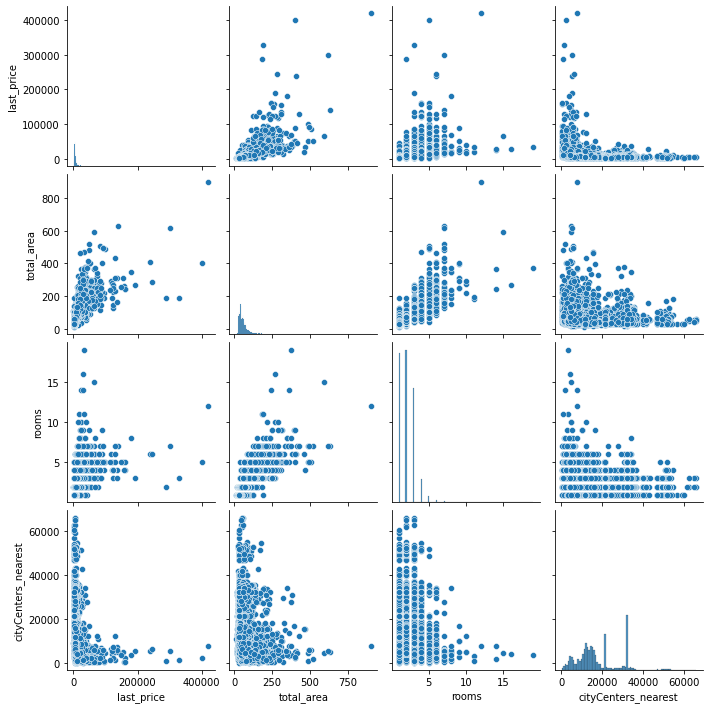

In [56]:
import seaborn as sns
sns.pairplot(best_data, vars = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest'])

 <div class="alert alert-info">Как видно из данной выборки на цену квартиры больше всего влияет общая площадь. Что в принципе логично: чем болльше - тем дороже
 Количество комнат также влияет на цену, но не настолько сильно как общая площадь.
 А вот горизонтальная прямая в показателе удалённости от центра и цены (правый верхний угол) говорит, что корреляция практически отсутствует.<div>

<AxesSubplot:xlabel='floor_category'>

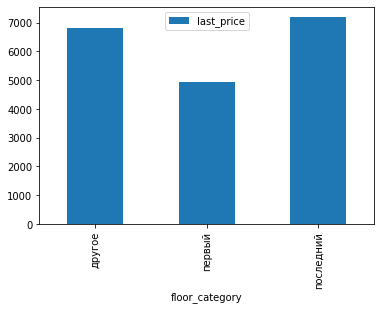

In [57]:
good_data.groupby('floor_category')[['last_price']].mean().plot(kind='bar')

<AxesSubplot:xlabel='floor_category'>

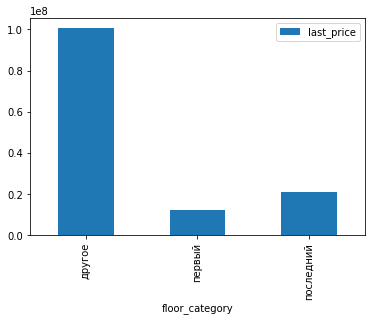

In [58]:
good_data.groupby('floor_category')[['last_price']].sum().plot(kind='bar')

<div class="alert alert-info">Как мы видим несмотря на тот факт, что общаяя сумма цены квартиры на не первый и последний этаж выше, средняя цена на последний и не первый +- близка.<div>

<AxesSubplot:xlabel='weekday'>

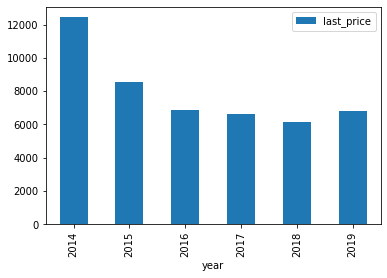

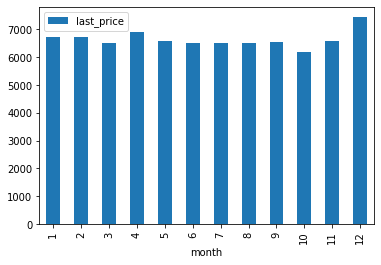

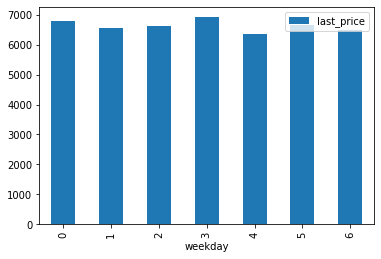

In [59]:
good_data.groupby('year')[['last_price']].mean().plot(kind='bar')
good_data.groupby('month')[['last_price']].mean().plot(kind='bar')
good_data.groupby('weekday')[['last_price']].mean().plot(kind='bar')

<div class="alert alert-info">Как видно из графиков день недели и месяц не сильно изменяется, а вот от года особенно если в 2014, то да. 
 Любопытен и проглядывается тренд на снижение.<div>


Выберем 10 населённых пунктов с наибольшим числом объявлений

In [60]:
data_10 = best_data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
search_data = best_data.query('locality_name in @data_10.index')

In [61]:
data_10_pivot = search_data.pivot_table(index='locality_name', values=['sqr_meter','last_price'], aggfunc='mean')
data_10_pivot.columns = ['last_price_avg', 'sqr_meter_avg'] 
data_10_pivot.sort_values(by='last_price_avg',ascending=False)

,last_price_avg,sqr_meter_avg
locality_name,,
Санкт-Петербург,7932.326230,113888.513599
Пушкин,6517.899595,103297.653904
посёлок Парголово,4506.199510,90756.003417
Петергоф,4393.484211,83754.204102
посёлок Шушары,4125.018573,78535.194019
Колпино,3967.444614,75221.567730
посёлок Мурино,3862.831154,85421.098470
Всеволожск,3816.803880,69029.150099
Гатчина,3493.687448,68635.620745


Самая высокая стоимость жилья в Санкт-Петербурге. Низкая в Выборге. Как и средняя стоимость квадратного метра.

In [62]:
spb_data = best_data.loc[(data['locality_name']=='Санкт-Петербург')]
spb_data['city_center_km']=round(spb_data['cityCenters_nearest']/1000)
spb_data['mean_km_price']=round(spb_data['last_price']/spb_data['city_center_km'])

/tmp/ipykernel_36/930369559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['city_center_km']=round(spb_data['cityCenters_nearest']/1000)
/tmp/ipykernel_36/930369559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['mean_km_price']=round(spb_data['last_price']/spb_data['city_center_km'])


<AxesSubplot:xlabel='last_price'>

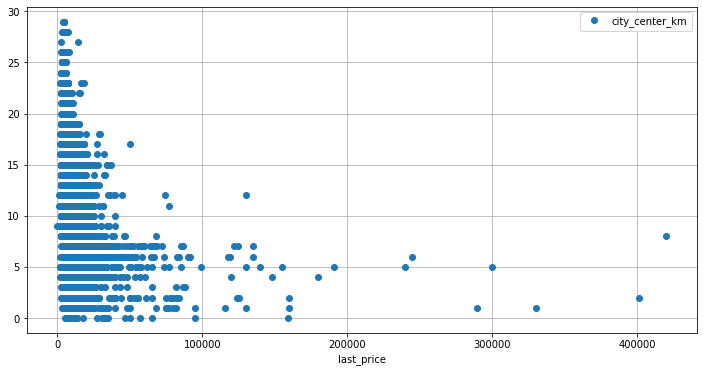

In [63]:
spb_data.plot(
    x='last_price', 
    y='city_center_km', 
    style='o', 
    grid=True,
    figsize=(12,6)
)

Относительно резкое падение пожмно наблюдать после 7 километра => делаем вывод что центр города заканчивается там.

In [64]:
spb_data_center = spb_data.query('city_center_km < 8')
spb_data_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,place_category,sqr_meter,year,month,weekday,floor_category,kitchen_total_relate,living_to_total_relate,city_center_km,mean_km_price
24,8,6500.0,97.20,2015-10-31,2,2.70,3.0,46.5,1,False,...,мегаполис,66872.427984,2015,10,5,первый,20.164609,47.839506,2.0,3250.0
35,6,15500.0,149.00,2017-06-26,5,2.70,5.0,104.0,4,False,...,мегаполис,104026.845638,2017,6,0,другое,11.409396,69.798658,4.0,3875.0
51,7,45000.0,161.00,2017-10-17,3,3.20,8.0,38.0,4,False,...,мегаполис,279503.105590,2017,10,1,другое,31.055901,23.602484,7.0,6429.0
52,20,11795.0,136.00,2017-09-22,6,3.00,2.0,94.0,2,False,...,мегаполис,86727.941176,2017,9,4,последний,8.088235,69.117647,7.0,1685.0
61,18,7990.0,74.00,2017-08-24,2,2.70,4.0,43.0,4,False,...,мегаполис,107972.972973,2017,8,3,последний,27.027027,58.108108,4.0,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250.0,47.00,2016-05-20,1,2.70,6.0,18.2,1,False,...,мегаполис,90425.531915,2016,5,4,первый,31.063830,38.723404,5.0,850.0
23681,13,5250.0,43.00,2018-05-11,2,2.50,5.0,29.0,2,False,...,мегаполис,122093.023256,2018,5,4,другое,13.953488,67.441860,7.0,750.0
23690,3,5500.0,52.00,2018-07-19,2,2.70,5.0,31.0,2,False,...,мегаполис,105769.230769,2018,7,3,другое,11.538462,59.615385,6.0,917.0
23691,11,9470.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,мегаполис,129903.978052,2016,10,3,другое,14.540466,55.281207,4.0,2368.0


<AxesSubplot:>

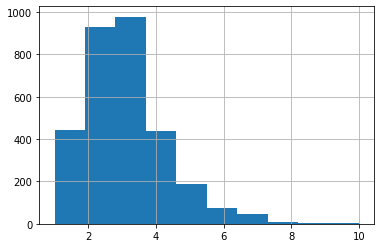

In [66]:
spb_data_center['rooms'].hist(range=(1,10),bins=10)

Преобладающее колчиество комнат - 3

<AxesSubplot:>

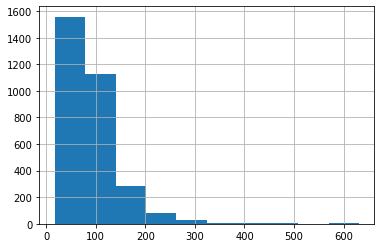

In [67]:
spb_data_center['total_area'].hist(bins=10)

Опять данные согласуются с данными по колчиеству комнат

<AxesSubplot:>

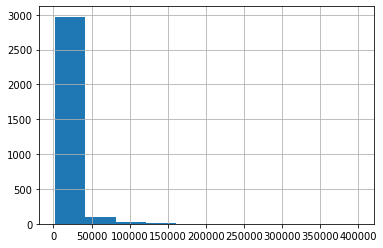

In [68]:
spb_data_center['last_price'].hist(bins=10)

<AxesSubplot:>

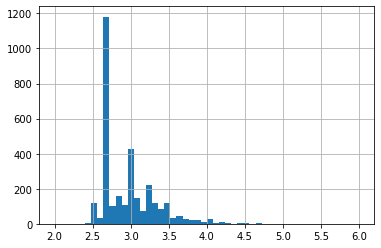

In [69]:
spb_data_center['ceiling_height'].hist(range=(2, 6),bins=50)

Большая часть квартир с высотой 2.7. Это логично по нормативу минимальная высота - 2.7. А вот что за квартиры меньше - это вопрос.

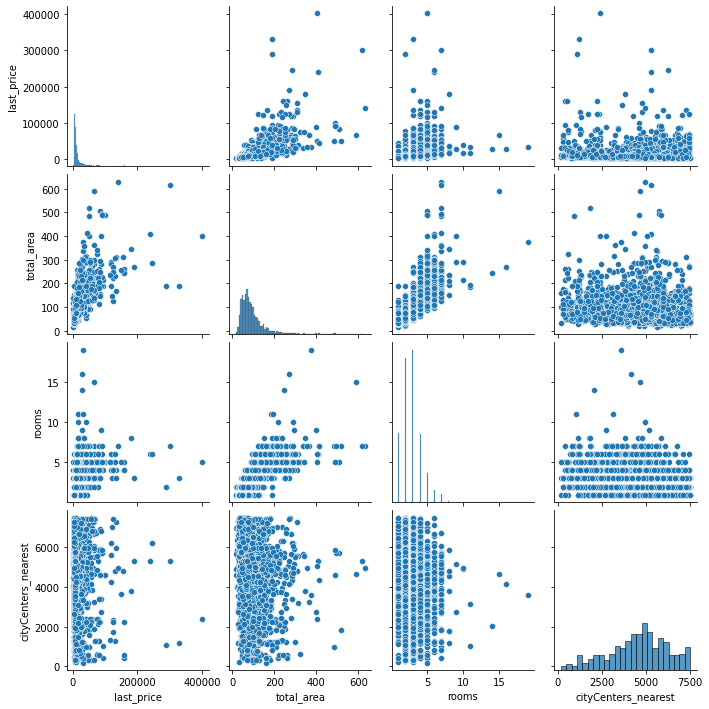

In [65]:
sns.pairplot(spb_data_center, vars = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest'])

<div class="alert alert-info">Как видно из графиков цена зависит от количества метров, причем горизонтальная линия в правом верхнем углу позволяет сказать, что влияние "ближайшей к центру" не настолько велико, и даже мало. А вот зависимость колчиества комант от общей площади прослеживется (но оно и интуитивно понятно). Все остальные параметры сильного влияения (судя по графикам) не имеют.<div>

<AxesSubplot:xlabel='floor_category'>

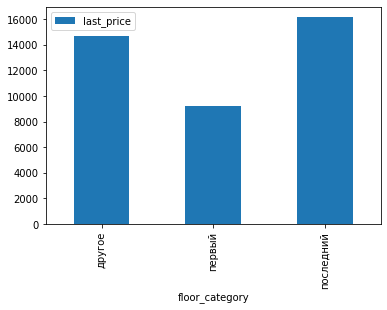

In [70]:
spb_data_center.groupby('floor_category')[['last_price']].mean().plot(kind='bar')

<div class="alert alert-info">А вот тут уже цена за последний этаж намного выше. Немудрено с последнего этажа дома смотреть на центр Питера куда приятней чем с первого. Цифры это подтвреждают.<div>

<AxesSubplot:xlabel='weekday'>

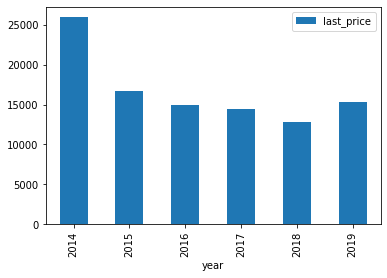

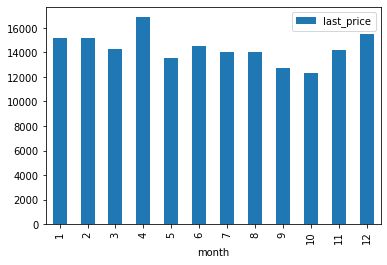

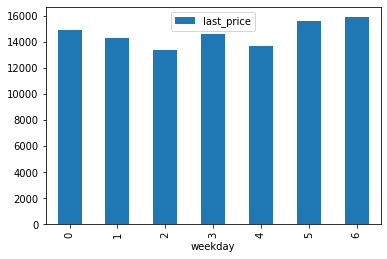

In [71]:
spb_data_center.groupby('year')[['last_price']].mean().plot(kind='bar')
spb_data_center.groupby('month')[['last_price']].mean().plot(kind='bar')
spb_data_center.groupby('weekday')[['last_price']].mean().plot(kind='bar')

<div class="alert alert-info">Года отображают примерно ту же ситуацию, что и в общей выборке по городам, а среди месяцев выделяется апрель. Дни недели имеют волнообразную структуру.Но лучше покупать кваритру в среду или четверг, а продовать в воскресенье.<div>

## Общий вывод

В целом в Санкт-Петербурге зависимость цены от квадратного метра +- одинаковая. Удивителен факт, что не важно в какой день недели или месяц вы публикуете. Цена же зависит в большую часть от площади причем как от общей так и внутренней(кухня/жилая).  Важно сколько комнат,чем их больше тем дороже и чем дальше от центра тем дешевле.
Лично я огромное количество времени потратил на предобработку данных. Заполнение пустот, удаление некорретных данных. Сам исследовательский процесс был намного интереснее, но ощущается, что осталось много моментов которые упустил, но которые хотел бы узнать и исправить.

<div class="alert alert-info">
    В данном исследовании была дана возможность поработать с реальными данными сервиса Яндекс.Недвижимости. 
    Необходимо было проанализировать данные, выявить неточности, преодобрабоать и после исследовать их, выявих интересные взаимосвязи.
    Познакомившись с данными, было выявлено очень большое количество пропусков в полях крайне необходимых для полного анализа. Можно было бы выкинуть все строки с пустыми значениями, но тогда общая выборка испарилась бы на 75% от того что было в начале. Поэтому на шаге предобработки данных был сделан ряд операций по заполнению пустых значений наиболее релевантными и корректными цифрами.
    После успешной предобработки данных, в ряде столбцов был видоизменен изначальный тип данных. Сделано это было, чтобы в последующем анализе визуализация выдавала доступную для интерпритирования картинку. Далее добавив несколько вспомогательных полей, можно было со спокойной душой перейти к самой интересной части исследования - исследовательскому анализу. 
    На первом этапе мы анализировали всю выборку. Откинули странные значения (например квартиры которые продались за меньше 1 дня и квартиры с потолком ниже норм САНПИНА). И начали их визуализировать и проводить корреляционный анализ. Он выявил, что максимальное влияние на цену квартиры имеет общая площади, а вот колчичество комнат несмотря на то что (казалось) бы имеют прямую взамиосвязь с площадью такого сильного влияния на цену не оказывают. Интересным наблюдением стало то, что фактор удалённости квартиры от центра не играет большой роли для цены на квартиру.
    Далее выявив свомими руками центр города, вы сделали отдельную выборку только по кваритрам центра города и принялись их анализировать. 
    Вывод оказался схож по большей части с общей выборкой, за исключением, что фактов удалённости от центра вообще потерял свой (хоть и малый) но вес. Также к интересным наблюдениям можно записать, что средння цена квартиры на последнем этаже значительно дороже квартир на другом этаже (в общей выборке такого кардинального вывода сделать нельзя). Также можно дать совет людям которые планируют покупать/продовать квартиру в центре в наше интересное время - продовайте в апреле в воскресенье. Покупайте в октябре в среду.
<div>